# Mahya Shahshahani
## RL - HW1

### Recommendation System

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt, log

### UCB

In [98]:

def pull(arm, means):
    return 1 if np.random.rand() < means[arm] else 0

def ucb_run(means, horizon, c):
    K = len(means)
    counts = np.zeros(K, dtype=int)
    values = np.zeros(K) ##miu_i_hat
    rewards = np.zeros(horizon)
    # initialize: play each arm once to prevent division by zero
    for a in range(K):
        r = pull(a, means)
        counts[a] = 1
        values[a] = r
        rewards[a] = r
    for t in range(K, horizon):
        total = t
        ucb_values = values + c * np.sqrt(2 * np.log(total) / counts)
        arm = int(np.argmax(ucb_values))
        r = pull(arm, means)
        counts[arm] += 1
        values[arm] += (r - values[arm]) / counts[arm]
        rewards[t] = r
    return rewards



def thompson_sampling_run(means, horizon):
    K = len(means)
    alpha = np.ones(K)  
    beta = np.ones(K)   
    rewards = np.zeros(horizon)
    
    for t in range(horizon):
        theta_samples = np.random.beta(alpha, beta)
        arm = int(np.argmax(theta_samples))
        r = pull(arm, means)
        alpha[arm] += r
        beta[arm] += (1 - r)
        rewards[t] = r
        
    return rewards

def epsilon_greedy_run(means, horizon, epsilon_0=1.0, epsilon_min=0.01, decay_rate=0.001):
    K = len(means)
    values = np.zeros(K)  
    counts = np.zeros(K, dtype=int)
    rewards = np.zeros(horizon)
    
    for t in range(horizon):
      
        epsilon = max(epsilon_min, epsilon_0 * np.exp(-decay_rate * t))
        
        if np.random.rand() < epsilon:
            arm = np.random.randint(K)  # exploration
        else:
            arm = int(np.argmax(values))  # exploitation
        
        r = pull(arm, means)
        counts[arm] += 1
        
        values[arm] += (r - values[arm]) / counts[arm]
        rewards[t] = r
    
    return rewards

In [117]:
means = [0.9, 0.9, 0.5, 0.9, 0.8]
HORIZON = 1000 #Times the recommendation is done in every trial.
TRIALS = 200 #Each trial is a new experiment
c = 1  # exploration coefficient
K = len(means)

In [118]:
cum_rewards_trials_ucb = np.zeros((TRIALS, HORIZON))
cum_regret_trials_ucb = np.zeros((TRIALS, HORIZON))
opt_mean = max(means)


In [119]:

for tr in range(TRIALS):
    rewards_ucb = ucb_run(means, HORIZON, c)
    cum_rewards_ucb = np.cumsum(rewards_ucb)
    cum_regret_ucb = np.cumsum(opt_mean - rewards_ucb) #if the optimal arm was chosen everytime
    cum_rewards_trials_ucb[tr] = cum_rewards_ucb #each horizon
    cum_regret_trials_ucb[tr] = cum_regret_ucb   #each horizon

avg_cum_rewards_ucb = np.mean(cum_rewards_trials_ucb, axis=0)
avg_cum_regret_ucb= np.mean(cum_regret_trials_ucb, axis=0)
avg_reward_ucb = avg_cum_rewards_ucb / (np.arange(HORIZON) + 1)


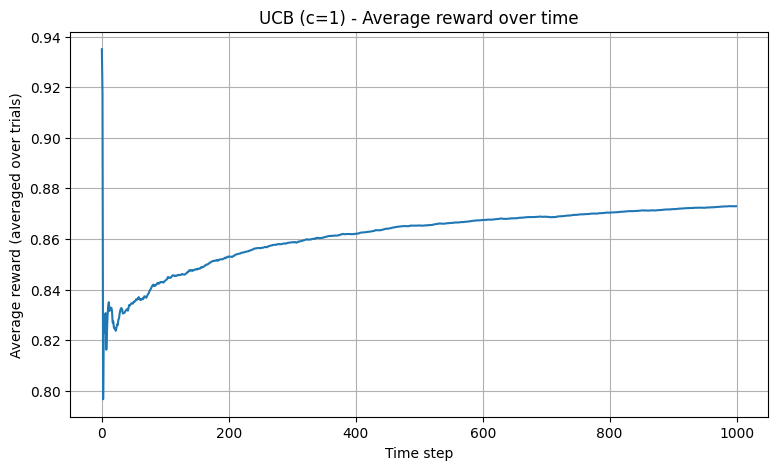

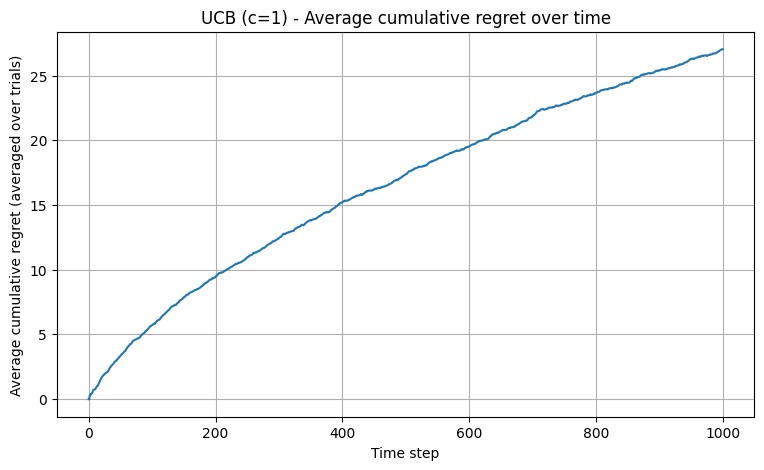

In [120]:
plt.figure(figsize=(9,5))
plt.plot(avg_reward_ucb)  # do not set colors
plt.xlabel("Time step")
plt.ylabel("Average reward (averaged over trials)")
plt.title(f"UCB (c={c}) - Average reward over time")
plt.grid(True)
plt.show()

plt.figure(figsize=(9,5))
plt.plot(avg_cum_regret_ucb)  # do not set colors
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret (averaged over trials)")
plt.title(f"UCB (c={c}) - Average cumulative regret over time")
plt.grid(True)
plt.show()


In [121]:
c_values = [0.05, 0.5, 1.0, 2.0]

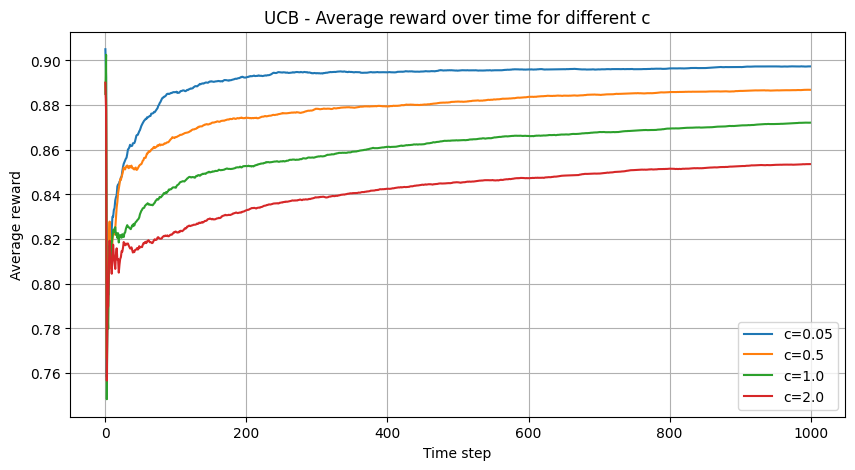

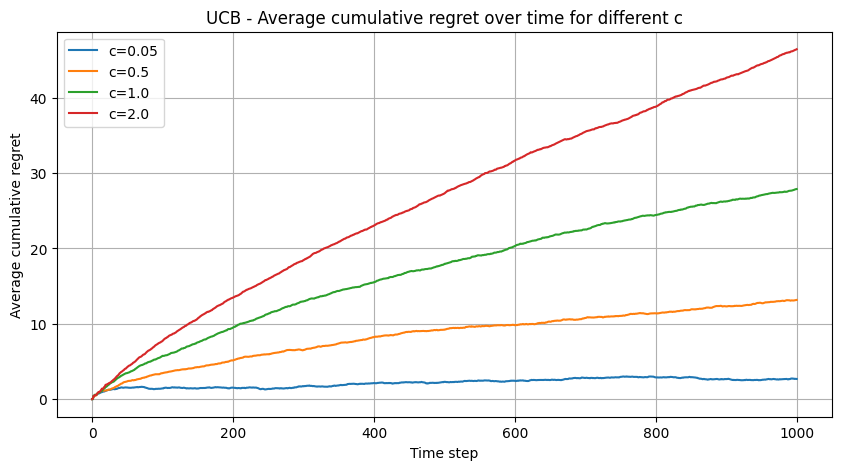

In [122]:
avg_rewards_all = []
avg_cumregret_all = []

for c in c_values:
    cum_rewards_trials = np.zeros((TRIALS, HORIZON))
    cum_regret_trials = np.zeros((TRIALS, HORIZON))
    
    for tr in range(TRIALS):
        rewards = ucb_run(means, HORIZON, c)
        cum_rewards_trials[tr] = np.cumsum(rewards)
        cum_regret_trials[tr] = np.cumsum(opt_mean - rewards)
    
    avg_cum_rewards = np.mean(cum_rewards_trials, axis=0)
    avg_cum_regret = np.mean(cum_regret_trials, axis=0)
    avg_reward = avg_cum_rewards / (np.arange(HORIZON) + 1)
    
    avg_rewards_all.append(avg_reward)
    avg_cumregret_all.append(avg_cum_regret)

#average reward
plt.figure(figsize=(10,5))
for i, c in enumerate(c_values):
    plt.plot(avg_rewards_all[i], label=f"c={c}")
plt.xlabel("Time step")
plt.ylabel("Average reward")
plt.title("UCB - Average reward over time for different c")
plt.legend()
plt.grid(True)
plt.show()

#cumulative regret
plt.figure(figsize=(10,5))
for i, c in enumerate(c_values):
    plt.plot(avg_cumregret_all[i], label=f"c={c}")
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret")
plt.title("UCB - Average cumulative regret over time for different c")
plt.legend()
plt.grid(True)
plt.show()

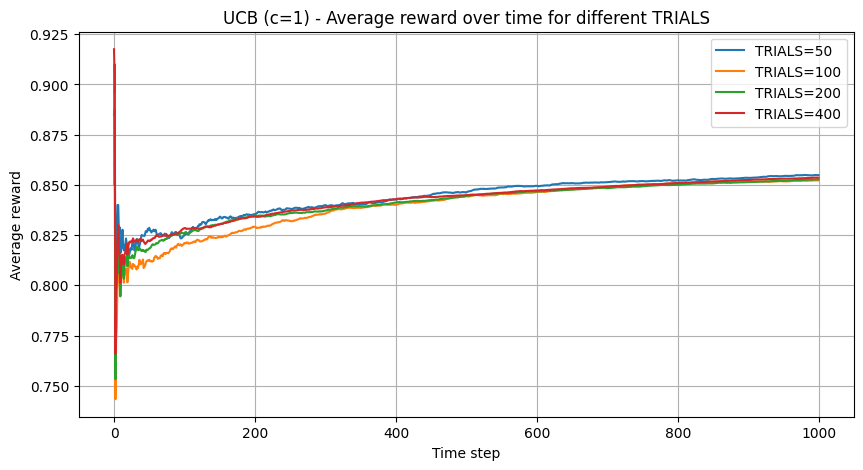

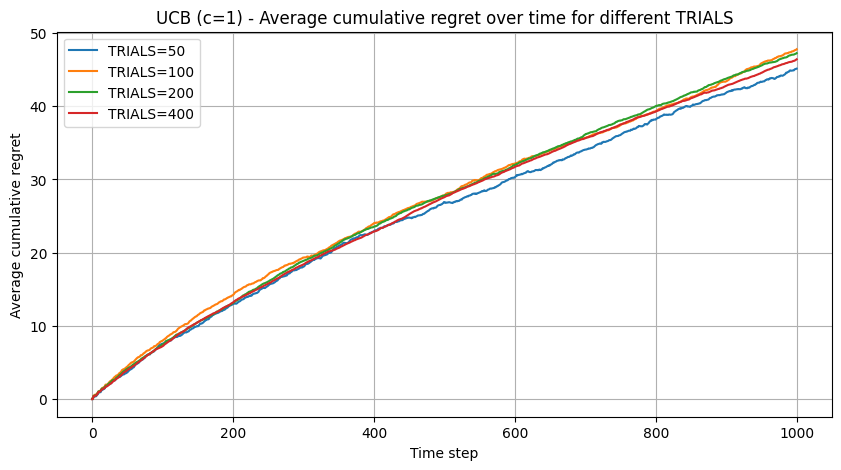

In [85]:
TRIALS_list = [50, 100, 200, 400]  
avg_rewards_all = []
avg_cumregret_all = []

for TRIALS in TRIALS_list:
    cum_rewards_trials = np.zeros((TRIALS, HORIZON))
    cum_regret_trials = np.zeros((TRIALS, HORIZON))
    
    for tr in range(TRIALS):
        rewards = ucb_run(means, HORIZON, c)
        cum_rewards_trials[tr] = np.cumsum(rewards)
        cum_regret_trials[tr] = np.cumsum(opt_mean - rewards)
    
    avg_cum_rewards = np.mean(cum_rewards_trials, axis=0)
    avg_cum_regret = np.mean(cum_regret_trials, axis=0)
    avg_reward = avg_cum_rewards / (np.arange(HORIZON) + 1)
    
    avg_rewards_all.append(avg_reward)
    avg_cumregret_all.append(avg_cum_regret)

#average reward
plt.figure(figsize=(10,5))
for i, TRIALS in enumerate(TRIALS_list):
    plt.plot(avg_rewards_all[i], label=f"TRIALS={TRIALS}")
plt.xlabel("Time step")
plt.ylabel("Average reward")
plt.title("UCB (c=1) - Average reward over time for different TRIALS")
plt.legend()
plt.grid(True)
plt.show()

# cumulative regret
plt.figure(figsize=(10,5))
for i, TRIALS in enumerate(TRIALS_list):
    plt.plot(avg_cumregret_all[i], label=f"TRIALS={TRIALS}")
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret")
plt.title("UCB (c=1) - Average cumulative regret over time for different TRIALS")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
HORIZON_values = [100, 300, 600, 1000]

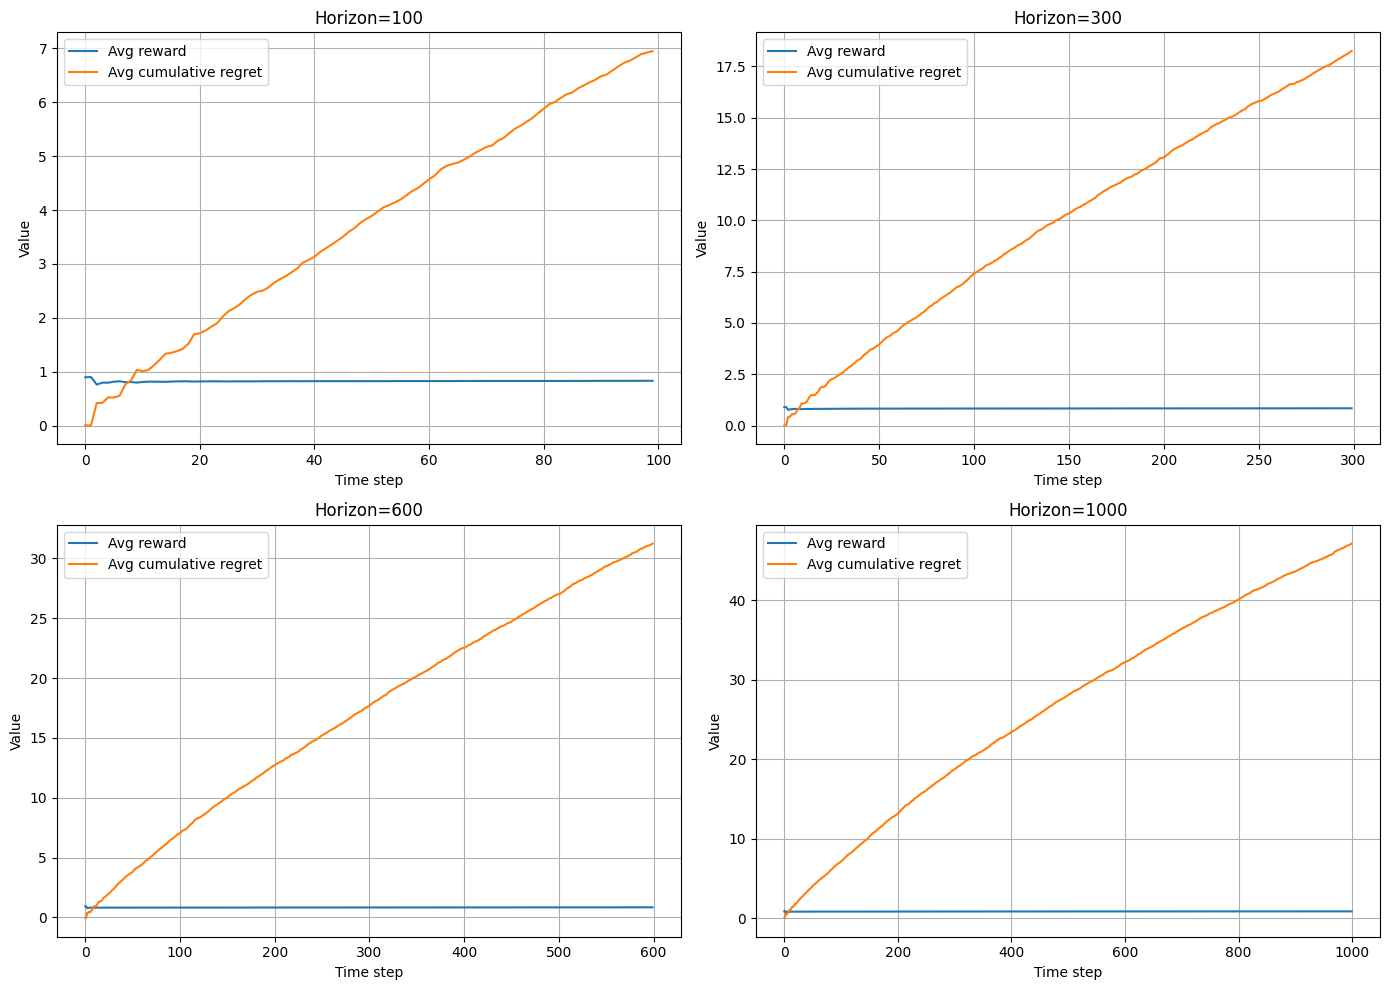

In [87]:
ig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, HORIZON in enumerate(HORIZON_values):
    cum_rewards_trials = np.zeros((TRIALS, HORIZON))
    cum_regret_trials = np.zeros((TRIALS, HORIZON))
    
    for tr in range(TRIALS):
        rewards = ucb_run(means, HORIZON, c)
        cum_rewards_trials[tr] = np.cumsum(rewards)
        cum_regret_trials[tr] = np.cumsum(opt_mean - rewards)
    
    avg_cum_rewards = np.mean(cum_rewards_trials, axis=0)
    avg_cum_regret = np.mean(cum_regret_trials, axis=0)
    avg_reward = avg_cum_rewards / (np.arange(HORIZON) + 1)
    
    row = i // 2
    col = i % 2
    axs[row, col].plot(avg_reward, label='Avg reward')
    axs[row, col].plot(avg_cum_regret, label='Avg cumulative regret')
    axs[row, col].set_title(f"Horizon={HORIZON}")
    axs[row, col].set_xlabel("Time step")
    axs[row, col].set_ylabel("Value")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()




### Thompson Sampling 

In [111]:
cum_rewards_trials_thompson = np.zeros((TRIALS, HORIZON))
cum_regret_trials_thompson = np.zeros((TRIALS, HORIZON))

for tr in range(TRIALS):
    rewards_thompson = thompson_sampling_run(means, HORIZON)
    cum_rewards_trials_thompson[tr] = np.cumsum(rewards_thompson)
    cum_regret_trials_thompson[tr] = np.cumsum(opt_mean - rewards_thompson)


In [112]:
avg_cum_rewards_thompson = np.mean(cum_rewards_trials_thompson, axis=0)
avg_cum_regret_thompson = np.mean(cum_regret_trials_thompson, axis=0)
avg_reward_thompson = avg_cum_rewards_thompson / (np.arange(HORIZON) + 1)

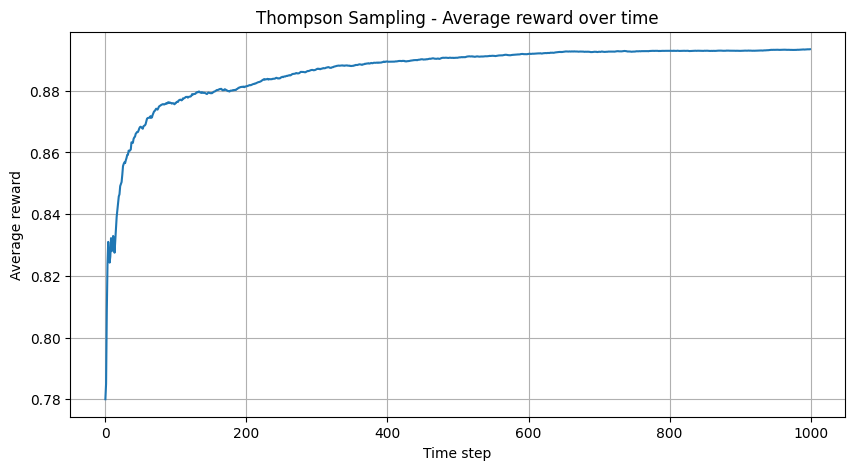

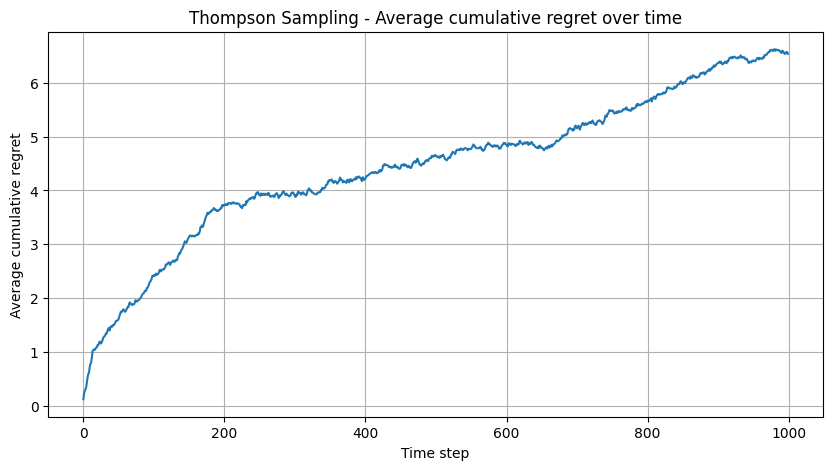

In [113]:
#average reward
plt.figure(figsize=(10,5))
plt.plot(avg_reward_thompson, label='Average reward')
plt.xlabel("Time step")
plt.ylabel("Average reward")
plt.title("Thompson Sampling - Average reward over time")
plt.grid(True)
plt.show()

# cumulative regret
plt.figure(figsize=(10,5))
plt.plot(avg_cum_regret_thompson, label='Average cumulative regret')
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret")
plt.title("Thompson Sampling - Average cumulative regret over time")
plt.grid(True)
plt.show()

### Value-based Epsilon Greedy

In [114]:
cum_rewards_trials_epsilon = np.zeros((TRIALS, HORIZON))
cum_regret_trials_epsilon = np.zeros((TRIALS, HORIZON))

for tr in range(TRIALS):
    rewards_epsilon = epsilon_greedy_run(means, HORIZON, epsilon_0=1.0, epsilon_min=0.01, decay_rate=0.005)
    cum_rewards_trials_epsilon[tr] = np.cumsum(rewards_epsilon)
    cum_regret_trials_epsilon[tr] = np.cumsum(opt_mean - rewards_epsilon)

In [115]:
avg_cum_rewards_epsilon = np.mean(cum_rewards_trials_epsilon, axis=0)
avg_cum_regret_epsilon = np.mean(cum_regret_trials_epsilon, axis=0)
avg_reward_epsilon = avg_cum_rewards_epsilon / (np.arange(HORIZON) + 1)

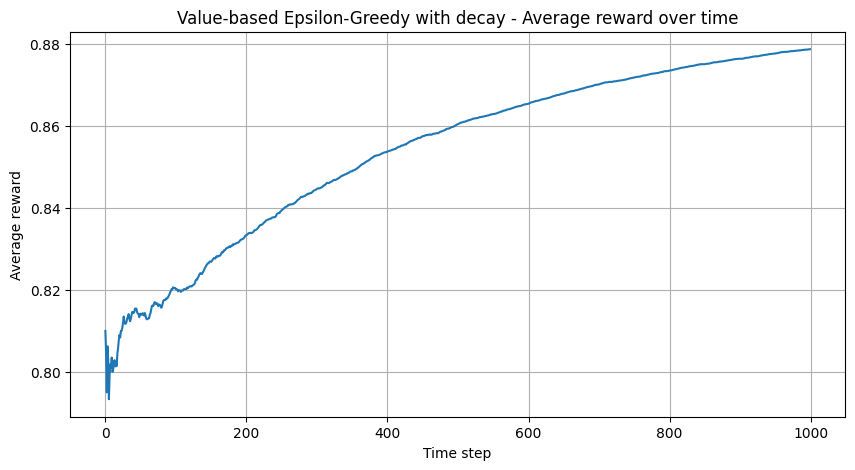

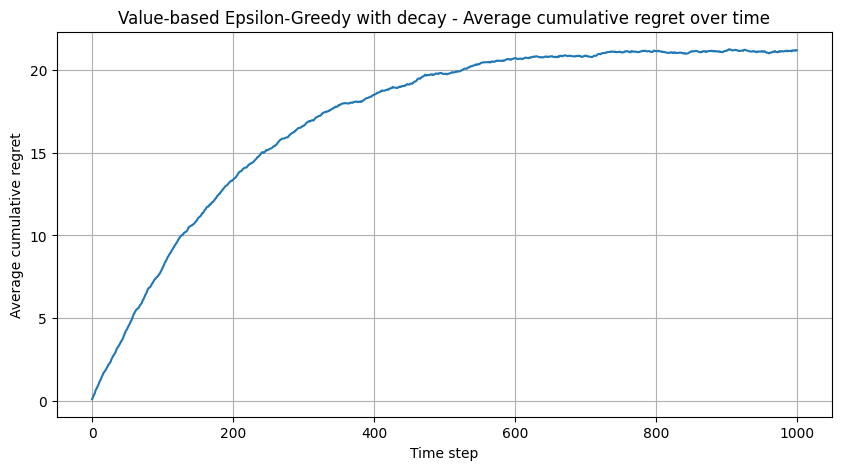

In [116]:
#average reward
plt.figure(figsize=(10,5))
plt.plot(avg_reward_epsilon, label='Average reward')
plt.xlabel("Time step")
plt.ylabel("Average reward")
plt.title("Value-based Epsilon-Greedy with decay - Average reward over time")
plt.grid(True)
plt.show()

#cumulative regret
plt.figure(figsize=(10,5))
plt.plot(avg_cum_regret_epsilon, label='Average cumulative regret')
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret")
plt.title("Value-based Epsilon-Greedy with decay - Average cumulative regret over time")
plt.grid(True)
plt.show()

### All three algorithms in comparison

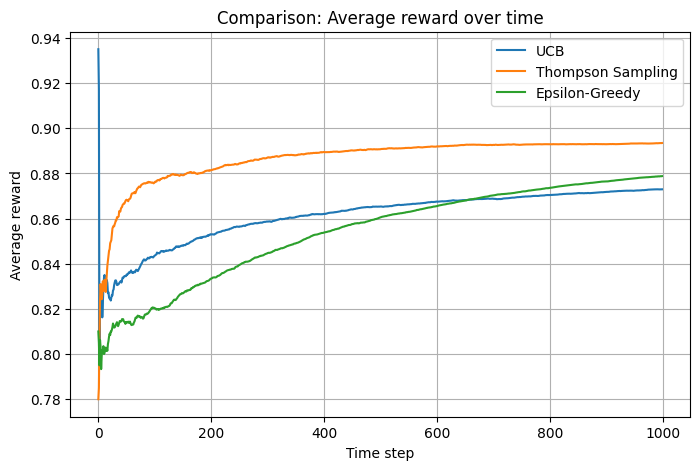

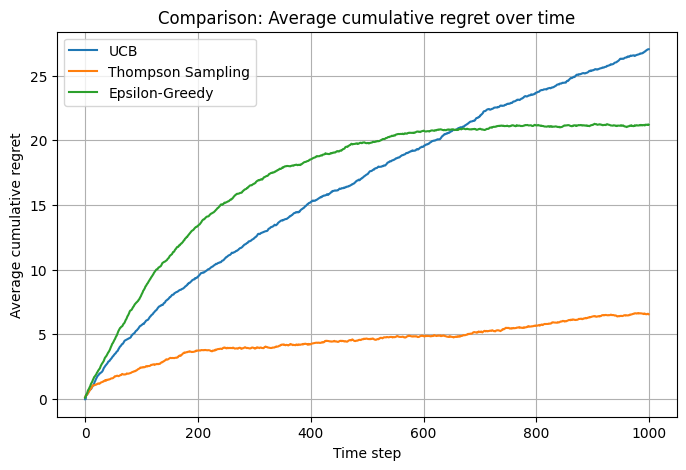

In [126]:
plt.figure(figsize=(8,5))
plt.plot(avg_reward_ucb, label='UCB')
plt.plot(avg_reward_thompson, label='Thompson Sampling')
plt.plot(avg_reward_epsilon, label='Epsilon-Greedy')
plt.xlabel("Time step")
plt.ylabel("Average reward")
plt.title("Comparison: Average reward over time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(avg_cum_regret_ucb, label='UCB')
plt.plot(avg_cum_regret_thompson, label='Thompson Sampling')
plt.plot(avg_cum_regret_epsilon, label='Epsilon-Greedy')
plt.xlabel("Time step")
plt.ylabel("Average cumulative regret")
plt.title("Comparison: Average cumulative regret over time")
plt.legend()
plt.grid(True)
plt.show()
